In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import random
from scipy.stats import bernoulli

from exchange import *
from agents import *
from simulation import *

# Define MainCharacter Policy

In [3]:
def execute_policy(e: Exchange, price_function, policy_number: int):
    # main character params: true_value, quantity, side, spread, cid

    if list(e.bids.keys()) != [] and list(e.asks.keys()) != []:
        tob_bid = max(e.bids.keys())
        tob_ask = min(e.asks.keys())
    else: 
        return
    current_true_value = price_function(e.get_timestamp())

    policies = []

    ### quote 6 wide around 100 ###
    policies.append(MainCharacter(true_value=100, quantity=10, side="AB", spread=3, cid=-1.5))

    ### quote 2 wide around 100 ### 
    policies.append(MainCharacter(true_value=100, quantity=10, side="AB", spread=1, cid=-2.5))

    ### quote 2 wide around 100, quantity 1 ###
    policies.append(MainCharacter(true_value=100, quantity=1, side="AB", spread=1, cid=-3.5))

    ### quote 2 wide around true val (perfect information) ###
    policies.append(MainCharacter(true_value = price_function(e.get_timestamp()), quantity=5, side="AB", spread=1, cid=-4.5))

    ### quote 2 wide around true val 10 timestamps ago ### 
    policies.append(MainCharacter(true_value=price_function(e.get_timestamp() - 10), quantity=5, side="AB", spread=1, cid=-5.5))

    ### quote 2 wide around true value 10 timestamps into future ###
    policies.append(MainCharacter(true_value=price_function(e.get_timestamp() + 10), quantity=5, side="AB", spread=1, cid=-6.5))

    ### quote 6 wide around true value  ###
    policies.append(MainCharacter(true_value=price_function(e.get_timestamp() + 10), quantity=5, side="AB", spread=3, cid=-7.5))

    ### psychic far looking wide policy ###
    policies.append(MainCharacter(true_value=price_function(e.get_timestamp() + 50), quantity=5, side="AB", spread=3, cid=-8.5))

    a = policies[policy_number]

    if policy_number <= 7:
        if a.cid not in list(e.ask_customers.keys()) and a.cid not in list(e.bid_customers.keys()):
            e.add_order(a)
        return

    ### quote 1 ticks from top of book ### 
    if policy_number == 8:
        b = MainCharacter(true_value=tob_bid, quantity=5, side="B", spread=1, cid=-9.5)
        a = MainCharacter(true_value=tob_ask, quantity=5, side="A", spread=1, cid=-9.5)
        if a.cid not in list(e.ask_customers.keys()):
            e.add_order(a)
        if b.cid not in list(e.bid_customers.keys()):
            e.add_order(b)

    #TODO: this seems bugged
    ### long-short taking strategy ###
    if policy_number == 9:
        if tob_ask < current_true_value:
            b = MainCharacter(true_value=tob_ask, quantity=min(10, e.asks[tob_ask]), side="B", spread=0, cid=-10.5)
            e.add_order(b)
        if tob_bid > current_true_value:
            a = MainCharacter(true_value=tob_bid, quantity=min(10, e.bids[tob_bid]), side="A", spread=0, cid=-10.5)
            e.add_order(a)

# Define Price Function

In [4]:
### constant price ###
# price_function = lambda t: 100

### linear increasing price ###
# price_function = lambda t: 0.003*t + 100

### linear decreasing price ###
# price_function = lambda t: -0.003*t + 100

### polynomial increasing price ### 
# price_function = lambda t: (t + 20) ** 0.5 + 100

### polynomial decreasing price ### 
# price_function = lambda t: -(t + 20) ** 0.5 + 200

### sine fluctuating ###
# price_function = lambda t: np.sin(t / 500) * 10 + 100

### exponential ###
# price_function = lambda t: t * np.exp(t / 10000) + 100

### polynomial sine ### 
# price_function = lambda t: -0.000005 * t ** 2 + 0.05 * t + 100 + np.sin(t / 500) * 30

In [5]:
price_function(100)

110.91007992385184

Text(0.5, 0, 'timestamp')

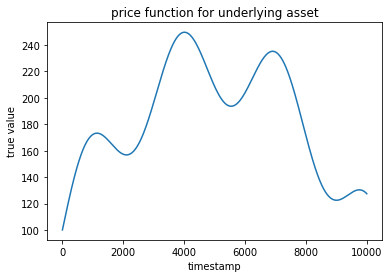

In [6]:
times = range(10000)
plt.plot([price_function(t) for t in times])
plt.title("price function for underlying asset")
plt.ylabel("true value")
plt.xlabel("timestamp")

# Run Simulation

### Constant Price Function

In [6]:
%%capture

price_function = lambda t: 100

policy_data = []
for policy_num in range(8):
    profits = []
    ranks = []
    exchanges = []
    summaries = []

    for iteration in range(20): # run 10 simulations
        e = simulate(price_function, execute_policy, policy_number=policy_num, agent_arrival_rate=0.1, taker_probability=0.4, n=100000)
        summary, profit = summarize_transactions(e, price_function, num_agents=20)
        summaries.append(summary)
        exchanges.append(e)

        if len(profit[profit.index % 1 == 0.5]) == 0:
            p = 0 
            rank = None
        else: 
            p = profit[profit.index % 1 == 0.5].iloc[0, -1]
            rank = list(profit.index % 1).index(0.5) + 1
        profits.append(p)
        ranks.append(rank)

    policy_data.append((profits, ranks, exchanges, summaries))

KeyboardInterrupt: 

In [47]:
# average profit for each simple policy
[np.mean(arr[0]) for arr in policy_data]

[354.2, 5373.9, 1080.8, 3641.5, 3660.95, 3605.1, 295.65, 321.7]

In [49]:
# average rank for each simple policy
[np.mean(arr[1]) for arr in policy_data]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.45, 1.15]

## Linear Increasing Price Function

In [ ]:
%%capture

price_function = lambda t: 0.003*t + 100

policy_data = []
for policy_num in range(8):
    profits = []
    ranks = []
    exchanges = []
    summaries = []

    for iteration in range(20): # run 10 simulations
        e = simulate(price_function, execute_policy, policy_number=policy_num, agent_arrival_rate=0.1, taker_probability=0.4, n=100000)
        summary, profit = summarize_transactions(e, price_function, num_agents=20)
        summaries.append(summary)
        exchanges.append(e)

        if len(profit[profit.index % 1 == 0.5]) == 0:
            p = 0 
            rank = None
        else: 
            p = profit[profit.index % 1 == 0.5].iloc[0, -1]
            rank = list(profit.index % 1).index(0.5) + 1
        profits.append(p)
        ranks.append(rank)

    policy_data.append((profits, ranks, exchanges, summaries))

In [74]:
# average profit for each simple policy
[np.mean(arr[0]) for arr in policy_data]

[-578834.3643067615,
 -585403.5613003845,
 -58631.3911460908,
 14355.202552681774,
 7505.667722155947,
 16051.965088847797,
 664.903354028788,
 6649.696144643107]

In [75]:
# average rank for each simple policy
[np.mean(arr[1]) for arr in policy_data]

[21.0, 21.0, 21.0, 4.3, 6.15, 1.9, 10.9, 6.15]

## Sine Price Function

In [11]:
%%capture

price_function = lambda t: np.sin(t / 500) * 10 + 100

policy_data = []
for policy_num in range(8):
    profits = []
    ranks = []
    exchanges = []
    summaries = []

    for iteration in range(20): # run 10 simulations
        e = simulate(price_function, execute_policy, policy_number=policy_num, agent_arrival_rate=0.1, taker_probability=0.4, n=100000)
        summary, profit = summarize_transactions(e, price_function, num_agents=20)
        summaries.append(summary)
        exchanges.append(e)

        if len(profit[profit.index % 1 == 0.5]) == 0:
            p = 0 
            rank = None
        else: 
            p = profit[profit.index % 1 == 0.5].iloc[0, -1]
            rank = list(profit.index % 1).index(0.5) + 1
        profits.append(p)
        ranks.append(rank)

    policy_data.append((profits, ranks, exchanges, summaries))
# average profit for each simple policy
[np.mean(arr[0]) for arr in policy_data]
# average rank for each simple policy
[np.mean(arr[1]) for arr in policy_data]

KeyboardInterrupt: 

In [ ]:
# average profit for each simple policy
[np.mean(arr[0]) for arr in policy_data]

[9747.194688442489,
 6148.274651557542,
 673.8184190494035,
 1150.3300414527773,
 1158.4746149092548,
 1021.6048162004463,
 778.8282858233193,
 268.3965249624733]

In [ ]:
# average rank for each simple policy
[np.mean(arr[1]) for arr in policy_data]

[1.0, 1.0, 3.3, 2.05, 2.25, 2.7, 4.1, 8.3]

## Exponential Price Function

In [57]:
%%capture

price_function = lambda t: t * np.exp(t / 10000) + 100

policy_data = []
for policy_num in range(8):
    profits = []
    ranks = []
    exchanges = []
    summaries = []

    for iteration in range(20): # run 10 simulations
        e = simulate(price_function, execute_policy, policy_number=policy_num, agent_arrival_rate=0.1, taker_probability=0.4, n=100000)
        summary, profit = summarize_transactions(e, price_function, num_agents=20)
        summaries.append(summary)
        exchanges.append(e)

        if len(profit[profit.index % 1 == 0.5]) == 0:
            p = 0 
            rank = None
        else: 
            p = profit[profit.index % 1 == 0.5].iloc[0, -1]
            rank = list(profit.index % 1).index(0.5) + 1
        profits.append(p)
        ranks.append(rank)

    policy_data.append((profits, ranks, exchanges, summaries))
# average profit for each simple policy
[np.mean(arr[0]) for arr in policy_data]
# average rank for each simple policy
[np.mean(arr[1]) for arr in policy_data]

In [58]:
# average profit for each simple policy
[np.mean(arr[0]) for arr in policy_data]

[-629071720856.7079,
 -703955893315.9158,
 -92270618453.07802,
 -110805064792.34229,
 -254455499232.09604,
 -72965454515.67749,
 -81440425045.16817,
 -4601431623.409572]

In [59]:
# average rank for each simple policy
[np.mean(arr[1]) for arr in policy_data]

[21.0, 21.0, 17.15, 17.7, 20.8, 15.6, 16.15, 11.25]

## Linear Decreasing Function

In [69]:
%%capture

price_function = lambda t: -0.003*t + 100

policy_data = []
for policy_num in range(8):
    profits = []
    ranks = []
    exchanges = []
    summaries = []

    for iteration in range(20): # run 10 simulations
        e = simulate(price_function, execute_policy, policy_number=policy_num, agent_arrival_rate=0.1, taker_probability=0.4, n=100000)
        summary, profit = summarize_transactions(e, price_function, num_agents=20)
        summaries.append(summary)
        exchanges.append(e)

        if len(profit[profit.index % 1 == 0.5]) == 0:
            p = 0 
            rank = None
        else: 
            p = profit[profit.index % 1 == 0.5].iloc[0, -1]
            rank = list(profit.index % 1).index(0.5) + 1
        profits.append(p)
        ranks.append(rank)

    policy_data.append((profits, ranks, exchanges, summaries))

In [70]:
# average profit for each simple policy
[np.mean(arr[0]) for arr in policy_data]

[-579833.7842418246,
 -585604.809501467,
 -58598.445777119116,
 11674.257029027498,
 9353.793755826515,
 16895.392594409175,
 401.0830512559278,
 4178.601003007083]

In [71]:
# average rank for each simple policy
[np.mean(arr[1]) for arr in policy_data]

[21.0, 21.0, 21.0, 4.55, 5.55, 2.75, 10.5, 7.95]

## Polynomial Increasing Function

In [89]:
%%capture

price_function = lambda t: (t + 20) ** 0.5 + 100

policy_data = []
for policy_num in range(8):
    profits = []
    ranks = []
    exchanges = []
    summaries = []

    for iteration in range(20): # run 10 simulations
        e = simulate(price_function, execute_policy, policy_number=policy_num, agent_arrival_rate=0.1, taker_probability=0.4, n=100000)
        summary, profit = summarize_transactions(e, price_function, num_agents=20)
        summaries.append(summary)
        exchanges.append(e)

        if len(profit[profit.index % 1 == 0.5]) == 0:
            p = 0 
            rank = None
        else: 
            p = profit[profit.index % 1 == 0.5].iloc[0, -1]
            rank = list(profit.index % 1).index(0.5) + 1
        profits.append(p)
        ranks.append(rank)

    policy_data.append((profits, ranks, exchanges, summaries))

In [90]:
# average profit for each simple policy
[np.mean(arr[0]) for arr in policy_data]

[-615542.9985465327,
 -620095.6546158987,
 -61981.60824848288,
 8171.099992865976,
 4480.639667714809,
 10592.633725972233,
 2518.2812300160786,
 8873.40225411972]

In [91]:
# average rank for each simple policy
[np.mean(arr[1]) for arr in policy_data]

[21.0, 21.0, 21.0, 4.4, 6.95, 2.85, 8.45, 3.25]

## Polynomial Decreasing Function

In [ ]:
%%capture

price_function = lambda t: -(t+20) ** 0.5 + 200

policy_data = []
for policy_num in range(8):
    profits = []
    ranks = []
    exchanges = []
    summaries = []

    for iteration in range(20): # run 10 simulations
        e = simulate(price_function, execute_policy, policy_number=policy_num, agent_arrival_rate=0.1, taker_probability=0.4, n=100000)
        summary, profit = summarize_transactions(e, price_function, num_agents=20)
        summaries.append(summary)
        exchanges.append(e)

        if len(profit[profit.index % 1 == 0.5]) == 0:
            p = 0 
            rank = None
        else: 
            p = profit[profit.index % 1 == 0.5].iloc[0, -1]
            rank = list(profit.index % 1).index(0.5) + 1
        profits.append(p)
        ranks.append(rank)

    policy_data.append((profits, ranks, exchanges, summaries))

In [1]:
# average profit for each simple policy
[np.mean(arr[0]) for arr in policy_data]

NameError: name 'policy_data' is not defined

In [94]:
# average rank for each simple policy
[np.mean(arr[1]) for arr in policy_data]

[21.0, 21.0, 21.0, 4.1, 7.35, 3.35, 10.05, 5.0]

## Polynomial Side

In [12]:
price_function = lambda t: -0.000005 * t ** 2 + 0.05 * t + 100 + np.sin(t / 500) * 30

In [7]:
price_function = lambda t: -0.000005 * (t + 50) ** 2 + 0.05 * (t+50) + 100

policy_data = []
for policy_num in range(8):
    profits = []
    ranks = []
    exchanges = []
    summaries = []

    for iteration in range(20): # run 10 simulations
        e = simulate(price_function, execute_policy, policy_number=policy_num, agent_arrival_rate=0.1, taker_probability=0.4, n=100000)
        summary, profit = summarize_transactions(e, price_function, num_agents=20)
        summaries.append(summary)
        exchanges.append(e)

        if len(profit[profit.index % 1 == 0.5]) == 0:
            p = 0 
            rank = None
        else: 
            p = profit[profit.index % 1 == 0.5].iloc[0, -1]
            rank = list(profit.index % 1).index(0.5) + 1
        profits.append(p)
        ranks.append(rank)

    policy_data.append((profits, ranks, exchanges, summaries))

: 

: 

In [ ]:
# average profit for each simple policy
[np.mean(arr[0]) for arr in policy_data]

[-331153.55503118125,
 -335745.44947740587,
 -33674.97183319397,
 9614.32542325389,
 4181.526551202818,
 10389.83220403835,
 712.4660710100706,
 7080.000915317076]

In [ ]:
# average rank for each simple policy
[np.mean(arr[1]) for arr in policy_data]

[21.0, 21.0, 21.0, 4.1, 7.35, 3.35, 10.05, 5.0]